In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

# "Best" Metric

### Safest = Best

### Submetrics
* [Fires](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh)
* [Crime/Arrests](https://data.wprdc.org/dataset/arrest-data)
* [EMS & Fire Dispatches](https://data.wprdc.org/dataset/allegheny-county-911-dispatches-ems-and-fire)
* [Asbestos](https://data.wprdc.org/dataset/allegheny-county-asbestos-permit)
* [Traffic Signs](https://www.youtube.com/watch?v=qHzaH4aSbho)

### "Safest"
* Least fires + ?

<AxesSubplot:>

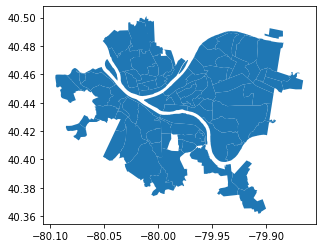

In [5]:
#read in shape file
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#display map
neighborhoods.plot()

In [7]:
#read in fire data
fires = pd.read_csv("Fires.csv")
fires.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [24]:
#drop data missing neighborhood paramater
fires = fires.dropna()
fires.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2018-03-12T09:13:28,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2018-03-14T19:46:10,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",2018-03-14T23:49:22,1,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240


In [25]:
# makes a series with neighborhoods and unique counts (the neighborhoods are row names) –– Ascending order by default
fire_counts_descending = fires['neighborhood'].value_counts().to_frame()

# convert row names into actual data (otherwise it's just a list of ints)
fire_counts_descending.reset_index(inplace=True) 

# rename columns
fire_counts_descending.columns = ['Neighborhood', 'Number of Fires'] 

fire_counts_descending.head(10)

,Neighborhood,Number of Fires
0,Carrick,235
1,Central Business District,208
2,Squirrel Hill South,208
3,Hazelwood,206
4,South Side Flats,206
5,East Liberty,171
6,Mount Washington,168
7,Lincoln-Lemington-Belmar,165
8,Homewood North,157
9,Homewood South,150


In [32]:
# make sure everything's in order
neighborhoods = neighborhoods.dropna()
neighborhoods[['hood','area','perimeter','geometry']]

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
84,Chartiers City,3683600.5,9983.549,"POLYGON ((-80.06952 40.46044, -80.06944 40.460..."
85,Ridgemont,10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."


In [33]:
# Same as before but this time set ascending to true (smallest->largest)
fire_counts_ascending = fires['neighborhood'].value_counts(ascending=True).to_frame()

fire_counts_ascending.reset_index(inplace=True) 

fire_counts_ascending.columns = ['Neighborhood', 'Number of Fires'] 

fire_counts_ascending.head(10)

,Neighborhood,Number of Fires
0,Regent Square,5
1,East Carnegie,8
2,Mt. Oliver,10
3,Ridgemont,10
4,St. Clair,11
5,Chartiers City,11
6,Oakwood,12
7,Arlington Heights,12
8,Hays,14
9,Swisshelm Park,14


In [41]:
# merge arrest data and shape data
fire_map = neighborhoods.merge(fire_counts_ascending, how='left', left_on='hood', right_on='Neighborhood')
# verify the data merged correctly
fire_map[['hood', 'Number of Fires', 'Neighborhood', 'geometry']].head()

,hood,Number of Fires,Neighborhood,geometry
0,Central Oakland,80,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,100,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,52,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,85,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,41,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


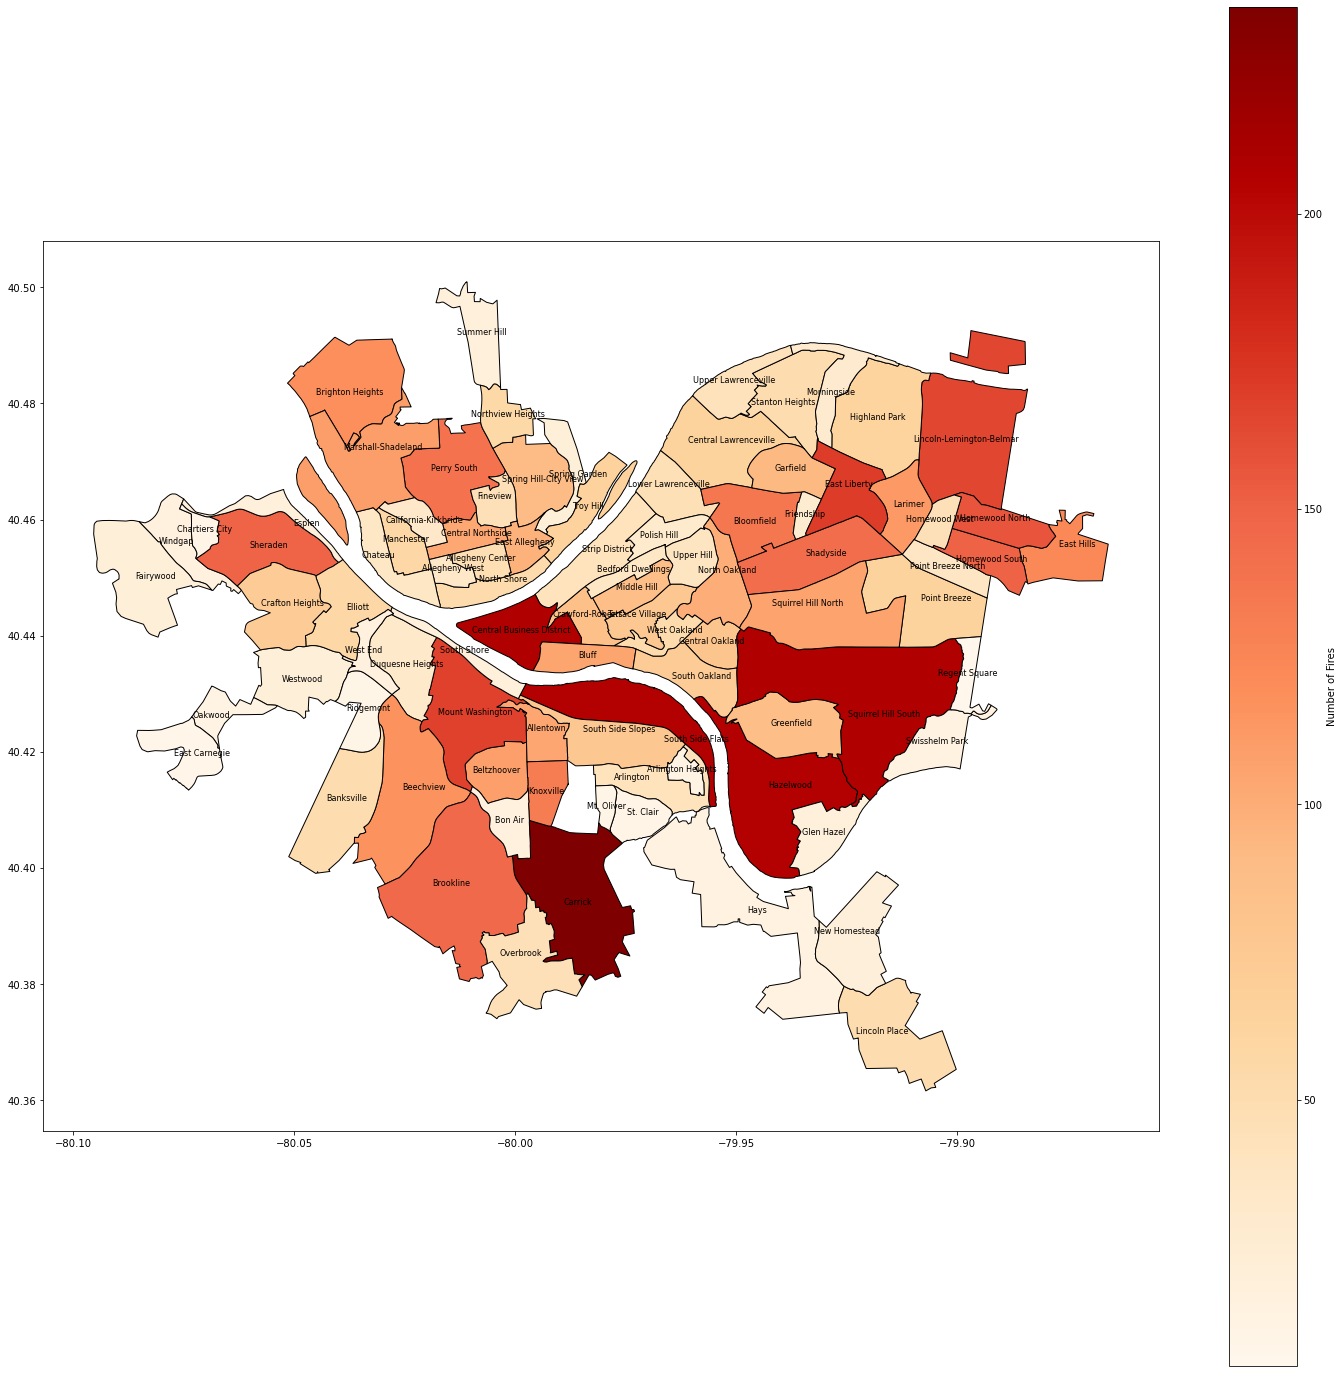

In [46]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
fire_map['coords'] = fire_map['geometry'].apply(lambda x: x.representative_point().coords[:])
fire_map['coords'] = [coords[0] for coords in fire_map['coords']]

# Map setup
fire_map.plot(column='Number of Fires', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Fires"}, # label the legend
               figsize=(25, 25)        # set the size
              # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in fire_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')
        
#fire_map.plot(column='Number of Fires', # set the data to be used for coloring
              # cmap='OrRd',              # choose a color palette
              # edgecolor="white",        # outline the districts in white
               #legend=True,              # show the legend
              # legend_kwds={'label': "Number of Fires"}, # label the legend
              # figsize=(15, 10)         # set the size
               #missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              # )

In [47]:
fire_counts_ascending.to_csv("FireData.csv")